In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.sparse as sp
from time import time
from sklearn.metrics import mean_squared_error
from sklearn.metrics.pairwise import pairwise_distances
from scipy.stats.stats import pearsonr
import graphlab
from sklearn.cross_validation import train_test_split
from math import sqrt
import scipy.sparse as sp
from scipy.sparse.linalg import svds
%matplotlib inline

In [26]:
from pattern.vector import stem, PORTER, LEMMA
punctuation = list(".,;:!?()[]{}`'\"@#$^&*+-|=~_")
from mrjob.job import MRJob
from collections import Counter, defaultdict
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from collections import Counter
import gensim
import string
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
from gensim import corpora
import operator

In [27]:
df = pd.read_csv("processed_data.csv")

In [28]:
reg = df[df["user_review_count"] > 2]
reg.shape

(47583, 36)

In [29]:
n_users = reg.userid.nunique()
n_items = reg.course_id.nunique()

In [30]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
validate_df = pd.read_csv("validation.csv")

In [9]:
train_df = train_df[["new_course_id", "new_user_id", "rating"]]
validate_df = validate_df[["new_course_id", "new_user_id", "rating"]]
test_df = test_df[["new_course_id", "new_user_id", "rating"]]

In [8]:
sf_train = graphlab.SFrame(train_df)
sf_validation = graphlab.SFrame(validate_df)
sf_test = graphlab.SFrame(test_df)

In [8]:
predictions_train_dic = {}
predictions_valid_dic = {}

for i in xrange(4, 20, 2):
    model = graphlab.recommender.factorization_recommender.create(sf_train, user_id='new_user_id', item_id='new_course_id',target='rating',solver='als',side_data_factorization=False, num_factors = i)
    predictions_train = model.predict(sf_train)
    predictions_valid = model.predict(sf_validation)
    predictions_train_dic[i] = np.sqrt(mean_squared_error(sf_train['rating'], predictions_train))
    predictions_valid_dic[i] = np.sqrt(mean_squared_error(sf_validation['rating'], predictions_valid))

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.298951s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 4        |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 87us         | NA                     |

+---------+--------------+------------------------+

| 0       | 51.616ms     | 0.285356               |

| 1       | 89.88ms      | 0.0772764              |

| 2       | 124.781ms    | 0.0676727              |

| 3       | 147.103ms    | 0.0620156              |

| 4       | 193.544ms    | 0.0583208              |

| 5       | 223.281ms    | 0.0554799              |

| 6       | 263.036ms    | 0.052985               |

| 7       | 299.594ms    | 0.050928               |

| 8       | 341.056ms    | 0.0493376              |

| 9       | 388.507ms    | 0.0480092              |

| 10      | 430.941ms    | 0.0468701              |

| 11      | 466.809ms    | 0.045877               |

| 12      | 502.392ms    | 0.044998               |

| 13      | 542.935ms    | 0.0442022              |

| 14      | 591.163ms    | 0.0434609              |

| 15      | 625.971ms    | 0.0427473              |

| 16      | 659.712ms    | 0.0420816              |

| 17      | 706.747ms    | 0.041456               |

| 18      | 749.816ms    | 0.0408516              |

| 19      | 790.579ms    | 0.0402658              |

| 20      | 836.629ms    | 0.0396891              |

| 21      | 855.471ms    | 0.0391157              |

| 22      | 899.214ms    | 0.0385327              |

| 23      | 936.26ms     | 0.0379433              |

| 24      | 976.367ms    | 0.0373851              |

| 25      | 1.01s        | 0.0368944              |

| 26      | 1.05s        | 0.036464               |

| 27      | 1.08s        | 0.0360673              |

| 28      | 1.10s        | 0.0356857              |

| 29      | 1.12s        | 0.0353174              |

| 30      | 1.17s        | 0.034958               |

| 31      | 1.22s        | 0.0346071              |

| 32      | 1.25s        | 0.0342643              |

| 33      | 1.29s        | 0.0339288              |

| 34      | 1.33s        | 0.0335995              |

| 35      | 1.37s        | 0.0332757              |

| 36      | 1.40s        | 0.0329576              |

| 37      | 1.44s        | 0.0326484              |

| 38      | 1.49s        | 0.0323512              |

| 39      | 1.51s        | 0.0320675              |

| 40      | 1.56s        | 0.0317966              |

| 41      | 1.60s        | 0.0315367              |

| 42      | 1.63s        | 0.0312868              |

| 43      | 1.68s        | 0.0310453              |

| 44      | 1.72s        | 0.0308123              |

| 45      | 1.74s        | 0.030588               |

| 46      | 1.78s        | 0.0303715              |

| 47      | 1.82s        | 0.0301645              |

| 48      | 1.86s        | 0.0299671              |

| 49      | 1.87s        | 0.0297773              |

| FINAL   | 1.87s        | 0.0297773              |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.046999s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 6        |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 92us         | NA                     |

+---------+--------------+------------------------+

| 0       | 51.841ms     | 0.226915               |

| 1       | 66.656ms     | 0.0311369              |

| 2       | 99.054ms     | 0.0257699              |

| 3       | 140.33ms     | 0.0228252              |

| 4       | 192.969ms    | 0.0207068              |

| 5       | 215.496ms    | 0.0190934              |

| 6       | 265.478ms    | 0.0177862              |

| 7       | 306.631ms    | 0.016667               |

| 8       | 331.907ms    | 0.015686               |

| 9       | 367.938ms    | 0.0148163              |

| 10      | 405.508ms    | 0.0140372              |

| 11      | 444.334ms    | 0.0133475              |

| 12      | 495.909ms    | 0.0127379              |

| 13      | 517.488ms    | 0.0122023              |

| 14      | 533.647ms    | 0.0117253              |

| 15      | 563.213ms    | 0.0112961              |

| 16      | 596.962ms    | 0.0109043              |

| 17      | 636.616ms    | 0.0105444              |

| 18      | 677.804ms    | 0.0102124              |

| 19      | 730.467ms    | 0.0099034              |

| 20      | 755.598ms    | 0.00961596             |

| 21      | 806.271ms    | 0.00934721             |

| 22      | 837.426ms    | 0.00909593             |

| 23      | 867.633ms    | 0.00885932             |

| 24      | 899.883ms    | 0.00863717             |

| 25      | 927.173ms    | 0.00842784             |

| 26      | 965.062ms    | 0.00823142             |

| 27      | 1.00s        | 0.00804673             |

| 28      | 1.04s        | 0.00787247             |

| 29      | 1.07s        | 0.00770774             |

| 30      | 1.11s        | 0.00755261             |

| 31      | 1.15s        | 0.00740633             |

| 32      | 1.18s        | 0.0072677              |

| 33      | 1.21s        | 0.00713633             |

| 34      | 1.25s        | 0.00701174             |

| 35      | 1.26s        | 0.00689371             |

| 36      | 1.30s        | 0.00678088             |

| 37      | 1.36s        | 0.00667321             |

| 38      | 1.38s        | 0.00657034             |

| 39      | 1.43s        | 0.0064715              |

| 40      | 1.46s        | 0.0063766              |

| 41      | 1.48s        | 0.00628518             |

| 42      | 1.52s        | 0.00619663             |

| 43      | 1.55s        | 0.00611059             |

| 44      | 1.58s        | 0.0060275              |

| 45      | 1.62s        | 0.00594643             |

| 46      | 1.68s        | 0.00586754             |

| 47      | 1.72s        | 0.00579054             |

| 48      | 1.76s        | 0.00571474             |

| 49      | 1.79s        | 0.00564066             |

| FINAL   | 1.79s        | 0.00564066             |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.054292s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 8        |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 69us         | NA                     |

+---------+--------------+------------------------+

| 0       | 41.127ms     | 0.182557               |

| 1       | 89.991ms     | 0.0158824              |

| 2       | 133.572ms    | 0.0119321              |

| 3       | 171.848ms    | 0.00975066             |

| 4       | 228.46ms     | 0.00842659             |

| 5       | 276.741ms    | 0.00749789             |

| 6       | 304.457ms    | 0.00678409             |

| 7       | 339.815ms    | 0.00620268             |

| 8       | 352.331ms    | 0.00572014             |

| 9       | 402.607ms    | 0.00531367             |

| 10      | 432.846ms    | 0.00496946             |

| 11      | 486.07ms     | 0.00467529             |

| 12      | 523.825ms    | 0.00441911             |

| 13      | 569.566ms    | 0.00419202             |

| 14      | 620.172ms    | 0.00398933             |

| 15      | 657.545ms    | 0.00380428             |

| 16      | 737.445ms    | 0.00363455             |

| 17      | 783.029ms    | 0.0034769              |

| 18      | 844.32ms     | 0.00333043             |

| 19      | 877.806ms    | 0.00319184             |

| 20      | 912.201ms    | 0.0030613              |

| 21      | 964.292ms    | 0.00293722             |

| 22      | 1.00s        | 0.00281899             |

| 23      | 1.05s        | 0.00270583             |

| 24      | 1.09s        | 0.00259819             |

| 25      | 1.13s        | 0.00249542             |

| 26      | 1.17s        | 0.00239982             |

| 27      | 1.20s        | 0.00230964             |

| 28      | 1.23s        | 0.00222479             |

| 29      | 1.26s        | 0.00214619             |

| 30      | 1.29s        | 0.0020737              |

| 31      | 1.34s        | 0.00200668             |

| 32      | 1.36s        | 0.00194548             |

| 33      | 1.41s        | 0.00188908             |

| 34      | 1.44s        | 0.00183632             |

| 35      | 1.47s        | 0.00178786             |

| 36      | 1.51s        | 0.00174254             |

| 37      | 1.55s        | 0.00170037             |

| 38      | 1.59s        | 0.00166062             |

| 39      | 1.63s        | 0.00162351             |

| 40      | 1.67s        | 0.00158817             |

| 41      | 1.71s        | 0.00155455             |

| 42      | 1.73s        | 0.00152268             |

| 43      | 1.78s        | 0.00149207             |

| 44      | 1.83s        | 0.00146331             |

| 45      | 1.86s        | 0.00143581             |

| 46      | 1.89s        | 0.00140953             |

| 47      | 1.93s        | 0.00138435             |

| 48      | 1.97s        | 0.00136064             |

| 49      | 2.00s        | 0.0013375              |

| FINAL   | 2.00s        | 0.0013375              |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.047968s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 89us         | NA                     |

+---------+--------------+------------------------+

| 0       | 52.18ms      | 0.151387               |

| 1       | 85.745ms     | 0.00646065             |

| 2       | 129.348ms    | 0.00464662             |

| 3       | 162.055ms    | 0.00367914             |

| 4       | 213.447ms    | 0.00300112             |

| 5       | 261.401ms    | 0.00251833             |

| 6       | 302.988ms    | 0.00218049             |

| 7       | 334.561ms    | 0.00193988             |

| 8       | 375.165ms    | 0.0017693              |

| 9       | 411.401ms    | 0.00164837             |

| 10      | 444.476ms    | 0.00155866             |

| 11      | 465.43ms     | 0.00148868             |

| 12      | 517.806ms    | 0.00143001             |

| 13      | 550.629ms    | 0.00137952             |

| 14      | 598.685ms    | 0.00133532             |

| 15      | 646.543ms    | 0.00129518             |

| 16      | 679.143ms    | 0.00125854             |

| 17      | 699.172ms    | 0.00122443             |

| 18      | 747.225ms    | 0.00119331             |

| 19      | 798.459ms    | 0.00116429             |

| 20      | 840.106ms    | 0.00113745             |

| 21      | 870.474ms    | 0.00111185             |

| 22      | 917.137ms    | 0.00108786             |

| 23      | 972.002ms    | 0.00106506             |

| 24      | 1.01s        | 0.00104345             |

| 25      | 1.06s        | 0.00102297             |

| 26      | 1.10s        | 0.0010039              |

| 27      | 1.15s        | 0.000985263            |

| 28      | 1.18s        | 0.000967328            |

| 29      | 1.23s        | 0.000950193            |

| 30      | 1.27s        | 0.000933673            |

| 31      | 1.30s        | 0.000918017            |

| 32      | 1.35s        | 0.000902981            |

| 33      | 1.39s        | 0.000888276            |

| 34      | 1.43s        | 0.000874489            |

| 35      | 1.47s        | 0.000860763            |

| 36      | 1.51s        | 0.000847716            |

| 37      | 1.55s        | 0.000835345            |

| 38      | 1.60s        | 0.000822904            |

| 39      | 1.64s        | 0.000810897            |

| 40      | 1.67s        | 0.000799736            |

| 41      | 1.72s        | 0.000788478            |

| 42      | 1.75s        | 0.000777666            |

| 43      | 1.80s        | 0.000767242            |

| 44      | 1.86s        | 0.000756794            |

| 45      | 1.90s        | 0.000746716            |

| 46      | 1.94s        | 0.000737231            |

| 47      | 1.98s        | 0.000728037            |

| 48      | 2.02s        | 0.000719075            |

| 49      | 2.05s        | 0.000710371            |

| FINAL   | 2.05s        | 0.000710371            |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.049725s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 12       |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 70us         | NA                     |

+---------+--------------+------------------------+

| 0       | 59.805ms     | 0.137975               |

| 1       | 89.621ms     | 0.0035646              |

| 2       | 141.884ms    | 0.00191137             |

| 3       | 183.374ms    | 0.0014605              |

| 4       | 227.511ms    | 0.00126832             |

| 5       | 266.846ms    | 0.00116294             |

| 6       | 317.846ms    | 0.00109502             |

| 7       | 366.426ms    | 0.00104195             |

| 8       | 414.753ms    | 0.00099971             |

| 9       | 462.418ms    | 0.000963801            |

| 10      | 501.785ms    | 0.000932925            |

| 11      | 555.414ms    | 0.000905021            |

| 12      | 604.723ms    | 0.000878855            |

| 13      | 634.332ms    | 0.000856372            |

| 14      | 691.333ms    | 0.000834489            |

| 15      | 730.181ms    | 0.000815099            |

| 16      | 774.993ms    | 0.000797163            |

| 17      | 815.391ms    | 0.000779263            |

| 18      | 860.554ms    | 0.000763459            |

| 19      | 912.038ms    | 0.000748148            |

| 20      | 950.107ms    | 0.000733363            |

| 21      | 979.306ms    | 0.000719318            |

| 22      | 1.02s        | 0.000706357            |

| 23      | 1.05s        | 0.000693648            |

| 24      | 1.11s        | 0.000681669            |

| 25      | 1.15s        | 0.000669827            |

| 26      | 1.20s        | 0.000658339            |

| 27      | 1.24s        | 0.000647651            |

| 28      | 1.28s        | 0.000637224            |

| 29      | 1.33s        | 0.000627039            |

| 30      | 1.38s        | 0.000617492            |

| 31      | 1.43s        | 0.000608124            |

| 32      | 1.49s        | 0.000599242            |

| 33      | 1.53s        | 0.000590154            |

| 34      | 1.57s        | 0.000582147            |

| 35      | 1.62s        | 0.000574076            |

| 36      | 1.68s        | 0.000565959            |

| 37      | 1.71s        | 0.000558583            |

| 38      | 1.76s        | 0.000551011            |

| 39      | 1.82s        | 0.000543801            |

| 40      | 1.85s        | 0.000536567            |

| 41      | 1.90s        | 0.000529522            |

| 42      | 1.93s        | 0.000523424            |

| 43      | 1.97s        | 0.000516776            |

| 44      | 2.02s        | 0.000510977            |

| 45      | 2.09s        | 0.00050464             |

| 46      | 2.14s        | 0.000498682            |

| 47      | 2.16s        | 0.000493087            |

| 48      | 2.21s        | 0.000487499            |

| 49      | 2.25s        | 0.000481968            |

| FINAL   | 2.25s        | 0.000481968            |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.047571s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 14       |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 57us         | NA                     |

+---------+--------------+------------------------+

| 0       | 72.433ms     | 0.124801               |

| 1       | 123.776ms    | 0.00284211             |

| 2       | 183.515ms    | 0.00141101             |

| 3       | 237.416ms    | 0.00116495             |

| 4       | 285.819ms    | 0.00103754             |

| 5       | 336.382ms    | 0.000948397            |

| 6       | 388.722ms    | 0.000882239            |

| 7       | 418.07ms     | 0.000828763            |

| 8       | 472.737ms    | 0.000787289            |

| 9       | 520.72ms     | 0.000752597            |

| 10      | 552.894ms    | 0.000723836            |

| 11      | 595.951ms    | 0.000696702            |

| 12      | 628.824ms    | 0.000672861            |

| 13      | 673.26ms     | 0.000649909            |

| 14      | 719.486ms    | 0.000631518            |

| 15      | 754.921ms    | 0.000614708            |

| 16      | 804.916ms    | 0.000598248            |

| 17      | 847.552ms    | 0.000584952            |

| 18      | 900.081ms    | 0.000569344            |

| 19      | 960.12ms     | 0.000558569            |

| 20      | 994.867ms    | 0.000546366            |

| 21      | 1.05s        | 0.000535258            |

| 22      | 1.11s        | 0.000524691            |

| 23      | 1.16s        | 0.000513866            |

| 24      | 1.21s        | 0.000503892            |

| 25      | 1.25s        | 0.000494541            |

| 26      | 1.28s        | 0.000485417            |

| 27      | 1.33s        | 0.000475698            |

| 28      | 1.38s        | 0.000465963            |

| 29      | 1.44s        | 0.000457743            |

| 30      | 1.50s        | 0.000450432            |

| 31      | 1.54s        | 0.000443624            |

| 32      | 1.60s        | 0.000437003            |

| 33      | 1.63s        | 0.000430459            |

| 34      | 1.69s        | 0.000424629            |

| 35      | 1.73s        | 0.000418824            |

| 36      | 1.79s        | 0.000412489            |

| 37      | 1.83s        | 0.000407178            |

| 38      | 1.87s        | 0.000401494            |

| 39      | 1.93s        | 0.00039646             |

| 40      | 1.98s        | 0.000391639            |

| 41      | 2.03s        | 0.000387089            |

| 42      | 2.08s        | 0.000382243            |

| 43      | 2.12s        | 0.000377615            |

| 44      | 2.17s        | 0.000373069            |

| 45      | 2.22s        | 0.000368861            |

| 46      | 2.26s        | 0.000364836            |

| 47      | 2.30s        | 0.00036055             |

| 48      | 2.34s        | 0.000356601            |

| 49      | 2.40s        | 0.000352883            |

| FINAL   | 2.40s        | 0.000352883            |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.046786s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 16       |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 82us         | NA                     |

+---------+--------------+------------------------+

| 0       | 68.702ms     | 0.107853               |

| 1       | 123.161ms    | 0.000990352            |

| 2       | 174.852ms    | 0.000946346            |

| 3       | 232.664ms    | 0.000863465            |

| 4       | 281.872ms    | 0.000740279            |

| 5       | 339.685ms    | 0.000785535            |

| 6       | 395.125ms    | 0.000659478            |

| 7       | 435.337ms    | 0.000698074            |

| 8       | 489.747ms    | 0.000630145            |

| 9       | 529.767ms    | 0.00056417             |

| 10      | 583.696ms    | 0.000590357            |

| 11      | 641.073ms    | 0.000556323            |

| 12      | 679.56ms     | 0.000526908            |

| 13      | 730.32ms     | 0.000508716            |

| 14      | 783.685ms    | 0.000529884            |

| 15      | 830.04ms     | 0.000468566            |

| 16      | 885.353ms    | 0.000486768            |

| 17      | 940.814ms    | 0.000475891            |

| 18      | 998.268ms    | 0.00045309             |

| 19      | 1.06s        | 0.000431535            |

| 20      | 1.09s        | 0.000455769            |

| 21      | 1.15s        | 0.000410895            |

| 22      | 1.20s        | 0.000405101            |

| 23      | 1.25s        | 0.000411347            |

| 24      | 1.30s        | 0.000406041            |

| 25      | 1.35s        | 0.000405851            |

| 26      | 1.40s        | 0.000411075            |

| 27      | 1.45s        | 0.000395889            |

| 28      | 1.51s        | 0.000370141            |

| 29      | 1.56s        | 0.000373697            |

| 30      | 1.62s        | 0.000371814            |

| 31      | 1.68s        | 0.00036692             |

| 32      | 1.73s        | 0.000354821            |

| 33      | 1.78s        | 0.000344536            |

| 34      | 1.85s        | 0.000339689            |

| 35      | 1.90s        | 0.000335417            |

| 36      | 1.95s        | 0.000333786            |

| 37      | 2.00s        | 0.000326633            |

| 38      | 2.05s        | 0.000330337            |

| 39      | 2.09s        | 0.00032499             |

| 40      | 2.14s        | 0.000316206            |

| 41      | 2.19s        | 0.000312135            |

| 42      | 2.24s        | 0.000316241            |

| 43      | 2.29s        | 0.000303785            |

| 44      | 2.34s        | 0.000301235            |

| 45      | 2.38s        | 0.0002996              |

| 46      | 2.42s        | 0.000292515            |

| 47      | 2.47s        | 0.000291879            |

| 48      | 2.52s        | 0.000288001            |

| 49      | 2.56s        | 0.000283886            |

| FINAL   | 2.56s        | 0.000283886            |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.047221s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 18       |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 68us         | NA                     |

+---------+--------------+------------------------+

| 0       | 53.764ms     | 0.104887               |

| 1       | 114.525ms    | 0.00082903             |

| 2       | 167.191ms    | 0.000674109            |

| 3       | 220.46ms     | 0.000590816            |

| 4       | 272.668ms    | 0.000528936            |

| 5       | 341.175ms    | 0.000490771            |

| 6       | 421.416ms    | 0.000455767            |

| 7       | 492.301ms    | 0.000426718            |

| 8       | 538.362ms    | 0.00040057             |

| 9       | 594.775ms    | 0.000385027            |

| 10      | 649.61ms     | 0.000369795            |

| 11      | 700.439ms    | 0.000357947            |

| 12      | 743.959ms    | 0.000347492            |

| 13      | 785.621ms    | 0.000338704            |

| 14      | 854.912ms    | 0.000329297            |

| 15      | 900.025ms    | 0.000322114            |

| 16      | 951.85ms     | 0.00031447             |

| 17      | 1.00s        | 0.000307611            |

| 18      | 1.05s        | 0.000300243            |

| 19      | 1.11s        | 0.000293627            |

| 20      | 1.16s        | 0.000288455            |

| 21      | 1.20s        | 0.000284209            |

| 22      | 1.26s        | 0.000279811            |

| 23      | 1.32s        | 0.000275202            |

| 24      | 1.38s        | 0.000270707            |

| 25      | 1.44s        | 0.000266451            |

| 26      | 1.50s        | 0.000262432            |

| 27      | 1.56s        | 0.000259187            |

| 28      | 1.62s        | 0.000255522            |

| 29      | 1.68s        | 0.000252397            |

| 30      | 1.73s        | 0.000249152            |

| 31      | 1.78s        | 0.000245752            |

| 32      | 1.84s        | 0.000242422            |

| 33      | 1.89s        | 0.000239788            |

| 34      | 1.95s        | 0.000236615            |

| 35      | 2.01s        | 0.000234291            |

| 36      | 2.06s        | 0.00023162             |

| 37      | 2.11s        | 0.000228731            |

| 38      | 2.17s        | 0.00022633             |

| 39      | 2.22s        | 0.000223972            |

| 40      | 2.28s        | 0.00022145             |

| 41      | 2.33s        | 0.000219214            |

| 42      | 2.40s        | 0.000216868            |

| 43      | 2.46s        | 0.000214715            |

| 44      | 2.51s        | 0.000212695            |

| 45      | 2.58s        | 0.00021087             |

| 46      | 2.63s        | 0.000208569            |

| 47      | 2.69s        | 0.000206466            |

| 48      | 2.75s        | 0.000204257            |

| 49      | 2.80s        | 0.000202066            |

| FINAL   | 2.80s        | 0.000202066            |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

In [9]:
predictions_train_dic

{4: 0.02977734651014214,
 6: 0.0056406600664062733,
 8: 0.0013374974898014732,
 10: 0.00071037086539186612,
 12: 0.00048196815370520329,
 14: 0.00035288288026116919,
 16: 0.00028388578778391422,
 18: 0.00020206625855935227}

In [10]:
predictions_valid_dic

{4: 0.9071484646809902,
 6: 0.7410301169593897,
 8: 0.73503360030251963,
 10: 0.70020738366917723,
 12: 0.68188804357304789,
 14: 0.73646883216272097,
 16: 0.7047981687576399,
 18: 0.67618787240860589}

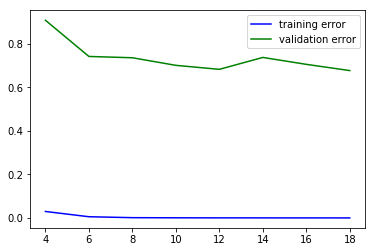

In [11]:
plt.plot(predictions_train_dic.keys(), predictions_train_dic.values(), color = "b", label = "training error")
plt.plot(predictions_valid_dic.keys(), predictions_valid_dic.values(), color = "g", label = "validation error")
plt.legend()

In [12]:

predictions_train_dic = {}
predictions_valid_dic = {}

for i in [100, 1, 0.1, 0.01, 0.0001, 0.00001, 0.000001, 0.0000001, 0.00000001, 0]:
    model = graphlab.recommender.factorization_recommender.create(sf_train, user_id='new_user_id', item_id='new_course_id',target='rating',solver='als',side_data_factorization=False, num_factors = 10, regularization=i)
    predictions_train = model.predict(sf_train)
    predictions_valid = model.predict(sf_validation)
    predictions_train_dic[i] = np.sqrt(mean_squared_error(sf_train['rating'], predictions_train))
    predictions_valid_dic[i] = np.sqrt(mean_squared_error(sf_validation['rating'], predictions_valid))
    

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.044754s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 100      |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 48us         | NA                     |

+---------+--------------+------------------------+

| 0       | 66.505ms     | 0.598309               |

| 1       | 118.35ms     | 0.598309               |

| 2       | 150.023ms    | 0.598309               |

| 3       | 210.348ms    | 0.598309               |

| 4       | 272.446ms    | 0.598309               |

| 5       | 297.015ms    | 0.598309               |

| 6       | 330.577ms    | 0.598309               |

| 7       | 373.93ms     | 0.598309               |

| 8       | 405.077ms    | 0.598309               |

| 9       | 453.3ms      | 0.598309               |

| 10      | 485.922ms    | 0.598309               |

| 11      | 528.779ms    | 0.598309               |

| 12      | 572.165ms    | 0.598309               |

| 13      | 607.613ms    | 0.598309               |

| 14      | 649.607ms    | 0.598309               |

| 15      | 685.767ms    | 0.598309               |

| 16      | 720.664ms    | 0.598309               |

| 17      | 755.294ms    | 0.598309               |

| 18      | 793.822ms    | 0.598309               |

| 19      | 841.003ms    | 0.598309               |

| 20      | 892.717ms    | 0.598309               |

| 21      | 936.264ms    | 0.598309               |

| 22      | 979.647ms    | 0.598309               |

| 23      | 1.02s        | 0.598309               |

| 24      | 1.06s        | 0.598309               |

| 25      | 1.10s        | 0.598309               |

| 26      | 1.14s        | 0.598309               |

| 27      | 1.17s        | 0.598309               |

| 28      | 1.21s        | 0.598309               |

| 29      | 1.25s        | 0.598309               |

| 30      | 1.29s        | 0.598309               |

| 31      | 1.34s        | 0.598309               |

| 32      | 1.38s        | 0.598309               |

| 33      | 1.44s        | 0.598309               |

| 34      | 1.49s        | 0.598309               |

| 35      | 1.52s        | 0.598309               |

| 36      | 1.57s        | 0.598309               |

| 37      | 1.61s        | 0.598309               |

| 38      | 1.67s        | 0.598309               |

| 39      | 1.71s        | 0.598309               |

| 40      | 1.76s        | 0.598309               |

| 41      | 1.80s        | 0.598309               |

| 42      | 1.85s        | 0.598309               |

| 43      | 1.89s        | 0.598309               |

| 44      | 1.94s        | 0.598309               |

| 45      | 1.99s        | 0.598309               |

| 46      | 2.02s        | 0.598309               |

| 47      | 2.06s        | 0.598309               |

| 48      | 2.10s        | 0.598309               |

| 49      | 2.14s        | 0.598309               |

| FINAL   | 2.15s        | 0.598309               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.05321s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 1        |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 113us        | NA                     |

+---------+--------------+------------------------+

| 0       | 60.119ms     | 0.598309               |

| 1       | 139.348ms    | 0.598309               |

| 2       | 179.737ms    | 0.598309               |

| 3       | 223.818ms    | 0.598309               |

| 4       | 260.508ms    | 0.598309               |

| 5       | 306.285ms    | 0.598309               |

| 6       | 341.867ms    | 0.598309               |

| 7       | 381.522ms    | 0.598309               |

| 8       | 421.699ms    | 0.598309               |

| 9       | 462.107ms    | 0.598309               |

| 10      | 497.057ms    | 0.598309               |

| 11      | 534.724ms    | 0.598309               |

| 12      | 559.78ms     | 0.598309               |

| 13      | 611.41ms     | 0.598309               |

| 14      | 639.58ms     | 0.598309               |

| 15      | 687.394ms    | 0.598309               |

| 16      | 727.414ms    | 0.598309               |

| 17      | 776.036ms    | 0.598309               |

| 18      | 814.944ms    | 0.598309               |

| 19      | 867.579ms    | 0.598309               |

| 20      | 912.597ms    | 0.598309               |

| 21      | 944.045ms    | 0.598309               |

| 22      | 986.203ms    | 0.598309               |

| 23      | 1.01s        | 0.598309               |

| 24      | 1.07s        | 0.598309               |

| 25      | 1.11s        | 0.598309               |

| 26      | 1.14s        | 0.598309               |

| 27      | 1.19s        | 0.598309               |

| 28      | 1.22s        | 0.598309               |

| 29      | 1.26s        | 0.598309               |

| 30      | 1.28s        | 0.598309               |

| 31      | 1.32s        | 0.598309               |

| 32      | 1.37s        | 0.598309               |

| 33      | 1.41s        | 0.598309               |

| 34      | 1.45s        | 0.598309               |

| 35      | 1.48s        | 0.598309               |

| 36      | 1.51s        | 0.598309               |

| 37      | 1.54s        | 0.598309               |

| 38      | 1.59s        | 0.598309               |

| 39      | 1.64s        | 0.598309               |

| 40      | 1.67s        | 0.598309               |

| 41      | 1.71s        | 0.598309               |

| 42      | 1.74s        | 0.598309               |

| 43      | 1.78s        | 0.598309               |

| 44      | 1.83s        | 0.598309               |

| 45      | 1.88s        | 0.598309               |

| 46      | 1.90s        | 0.598309               |

| 47      | 1.94s        | 0.598309               |

| 48      | 1.98s        | 0.598309               |

| 49      | 2.02s        | 0.598309               |

| FINAL   | 2.02s        | 0.598309               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.047172s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 0.1      |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 90us         | NA                     |

+---------+--------------+------------------------+

| 0       | 52.394ms     | 0.598309               |

| 1       | 111.826ms    | 0.598309               |

| 2       | 159.394ms    | 0.598309               |

| 3       | 219.001ms    | 0.598309               |

| 4       | 247.198ms    | 0.598309               |

| 5       | 289.556ms    | 0.598309               |

| 6       | 332.44ms     | 0.598309               |

| 7       | 395.578ms    | 0.598309               |

| 8       | 435.098ms    | 0.598309               |

| 9       | 482.743ms    | 0.598309               |

| 10      | 518.766ms    | 0.598309               |

| 11      | 568.7ms      | 0.598309               |

| 12      | 601.18ms     | 0.598309               |

| 13      | 651.828ms    | 0.598309               |

| 14      | 683.031ms    | 0.598309               |

| 15      | 725.6ms      | 0.598309               |

| 16      | 764.159ms    | 0.598309               |

| 17      | 810.743ms    | 0.598309               |

| 18      | 842.141ms    | 0.598309               |

| 19      | 884.834ms    | 0.598309               |

| 20      | 916.822ms    | 0.598309               |

| 21      | 966.573ms    | 0.598309               |

| 22      | 998.852ms    | 0.598309               |

| 23      | 1.06s        | 0.598309               |

| 24      | 1.10s        | 0.598309               |

| 25      | 1.14s        | 0.598309               |

| 26      | 1.18s        | 0.598309               |

| 27      | 1.22s        | 0.598309               |

| 28      | 1.26s        | 0.598309               |

| 29      | 1.31s        | 0.598309               |

| 30      | 1.36s        | 0.598309               |

| 31      | 1.41s        | 0.598309               |

| 32      | 1.44s        | 0.598309               |

| 33      | 1.47s        | 0.598309               |

| 34      | 1.53s        | 0.598309               |

| 35      | 1.57s        | 0.598309               |

| 36      | 1.62s        | 0.598309               |

| 37      | 1.68s        | 0.598309               |

| 38      | 1.75s        | 0.598309               |

| 39      | 1.78s        | 0.598309               |

| 40      | 1.82s        | 0.598309               |

| 41      | 1.86s        | 0.598309               |

| 42      | 1.90s        | 0.598309               |

| 43      | 1.95s        | 0.598309               |

| 44      | 2.00s        | 0.598309               |

| 45      | 2.03s        | 0.598309               |

| 46      | 2.08s        | 0.598309               |

| 47      | 2.12s        | 0.598309               |

| 48      | 2.15s        | 0.598309               |

| 49      | 2.18s        | 0.598309               |

| FINAL   | 2.18s        | 0.598309               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.049052s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 0.01     |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 99us         | NA                     |

+---------+--------------+------------------------+

| 0       | 73.248ms     | 0.598309               |

| 1       | 106.395ms    | 0.598309               |

| 2       | 165.43ms     | 0.598309               |

| 3       | 221.443ms    | 0.598309               |

| 4       | 270.166ms    | 0.598309               |

| 5       | 334.95ms     | 0.598309               |

| 6       | 380.53ms     | 0.598309               |

| 7       | 420.495ms    | 0.598309               |

| 8       | 448.402ms    | 0.598309               |

| 9       | 472.262ms    | 0.598309               |

| 10      | 520.644ms    | 0.598309               |

| 11      | 562.935ms    | 0.598309               |

| 12      | 613.636ms    | 0.598309               |

| 13      | 666.317ms    | 0.598309               |

| 14      | 720.582ms    | 0.598309               |

| 15      | 767.502ms    | 0.598309               |

| 16      | 803.112ms    | 0.598309               |

| 17      | 834.837ms    | 0.598309               |

| 18      | 881.559ms    | 0.598309               |

| 19      | 920.615ms    | 0.598309               |

| 20      | 960.385ms    | 0.598309               |

| 21      | 1.00s        | 0.598309               |

| 22      | 1.06s        | 0.598309               |

| 23      | 1.08s        | 0.598309               |

| 24      | 1.14s        | 0.598309               |

| 25      | 1.19s        | 0.598309               |

| 26      | 1.23s        | 0.598309               |

| 27      | 1.28s        | 0.598309               |

| 28      | 1.33s        | 0.598309               |

| 29      | 1.36s        | 0.598309               |

| 30      | 1.41s        | 0.598309               |

| 31      | 1.44s        | 0.598309               |

| 32      | 1.48s        | 0.598309               |

| 33      | 1.52s        | 0.598309               |

| 34      | 1.57s        | 0.598309               |

| 35      | 1.60s        | 0.598309               |

| 36      | 1.65s        | 0.598309               |

| 37      | 1.68s        | 0.598309               |

| 38      | 1.72s        | 0.598309               |

| 39      | 1.77s        | 0.598309               |

| 40      | 1.83s        | 0.598309               |

| 41      | 1.89s        | 0.598309               |

| 42      | 1.94s        | 0.598309               |

| 43      | 1.99s        | 0.598309               |

| 44      | 2.04s        | 0.598309               |

| 45      | 2.09s        | 0.598309               |

| 46      | 2.13s        | 0.598309               |

| 47      | 2.19s        | 0.598309               |

| 48      | 2.23s        | 0.598309               |

| 49      | 2.27s        | 0.598309               |

| FINAL   | 2.27s        | 0.598309               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.052257s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 0.0001   |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 65us         | NA                     |

+---------+--------------+------------------------+

| 0       | 66.377ms     | 0.598304               |

| 1       | 109.03ms     | 0.596968               |

| 2       | 135.459ms    | 0.520895               |

| 3       | 179.327ms    | 0.41998                |

| 4       | 232.82ms     | 0.370343               |

| 5       | 269.103ms    | 0.345131               |

| 6       | 322.387ms    | 0.330077               |

| 7       | 367.027ms    | 0.323087               |

| 8       | 418.087ms    | 0.31948                |

| 9       | 445.475ms    | 0.317573               |

| 10      | 493.716ms    | 0.316362               |

| 11      | 545.076ms    | 0.315503               |

| 12      | 594.245ms    | 0.31489                |

| 13      | 626.349ms    | 0.314454               |

| 14      | 660.884ms    | 0.31414                |

| 15      | 730.998ms    | 0.313905               |

| 16      | 760.486ms    | 0.313723               |

| 17      | 813.476ms    | 0.313577               |

| 18      | 860.976ms    | 0.313457               |

| 19      | 907.18ms     | 0.313354               |

| 20      | 954.311ms    | 0.313265               |

| 21      | 996.756ms    | 0.313186               |

| 22      | 1.03s        | 0.313116               |

| 23      | 1.07s        | 0.313053               |

| 24      | 1.12s        | 0.312996               |

| 25      | 1.16s        | 0.312944               |

| 26      | 1.19s        | 0.312895               |

| 27      | 1.25s        | 0.312851               |

| 28      | 1.29s        | 0.312809               |

| 29      | 1.34s        | 0.312771               |

| 30      | 1.37s        | 0.312735               |

| 31      | 1.42s        | 0.312701               |

| 32      | 1.45s        | 0.312669               |

| 33      | 1.52s        | 0.312638               |

| 34      | 1.55s        | 0.31261                |

| 35      | 1.60s        | 0.312583               |

| 36      | 1.66s        | 0.312557               |

| 37      | 1.70s        | 0.312532               |

| 38      | 1.74s        | 0.312509               |

| 39      | 1.78s        | 0.312486               |

| 40      | 1.81s        | 0.312465               |

| 41      | 1.86s        | 0.312444               |

| 42      | 1.91s        | 0.312424               |

| 43      | 1.95s        | 0.312405               |

| 44      | 1.99s        | 0.312387               |

| 45      | 2.04s        | 0.312369               |

| 46      | 2.09s        | 0.312352               |

| 47      | 2.12s        | 0.312335               |

| 48      | 2.18s        | 0.312319               |

| 49      | 2.21s        | 0.312304               |

| FINAL   | 2.21s        | 0.312304               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.048544s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 1e-05    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 75us         | NA                     |

+---------+--------------+------------------------+

| 0       | 48.037ms     | 0.594129               |

| 1       | 94.161ms     | 0.122959               |

| 2       | 123.495ms    | 0.0492622              |

| 3       | 173.235ms    | 0.0446454              |

| 4       | 214.803ms    | 0.0435106              |

| 5       | 271.706ms    | 0.0431492              |

| 6       | 324.777ms    | 0.0430814              |

| 7       | 374.436ms    | 0.0431523              |

| 8       | 425.95ms     | 0.0432722              |

| 9       | 473.043ms    | 0.0433975              |

| 10      | 531.907ms    | 0.0435181              |

| 11      | 594.871ms    | 0.0436335              |

| 12      | 641.991ms    | 0.0437411              |

| 13      | 690.106ms    | 0.0438384              |

| 14      | 739.801ms    | 0.0439238              |

| 15      | 791.79ms     | 0.0439969              |

| 16      | 849.092ms    | 0.0440587              |

| 17      | 876.083ms    | 0.0441103              |

| 18      | 917.145ms    | 0.0441529              |

| 19      | 976.568ms    | 0.0441878              |

| 20      | 1.02s        | 0.044216               |

| 21      | 1.06s        | 0.0442384              |

| 22      | 1.09s        | 0.044256               |

| 23      | 1.13s        | 0.0442697              |

| 24      | 1.17s        | 0.04428                |

| 25      | 1.21s        | 0.0442878              |

| 26      | 1.25s        | 0.0442935              |

| 27      | 1.31s        | 0.0442976              |

| 28      | 1.35s        | 0.0443003              |

| 29      | 1.38s        | 0.044302               |

| 30      | 1.44s        | 0.0443027              |

| 31      | 1.49s        | 0.0443027              |

| 32      | 1.54s        | 0.0443021              |

| 33      | 1.57s        | 0.0443011              |

| 34      | 1.60s        | 0.0442995              |

| 35      | 1.64s        | 0.0442977              |

| 36      | 1.69s        | 0.0442956              |

| 37      | 1.73s        | 0.0442933              |

| 38      | 1.76s        | 0.0442908              |

| 39      | 1.80s        | 0.0442882              |

| 40      | 1.86s        | 0.0442855              |

| 41      | 1.90s        | 0.0442827              |

| 42      | 1.95s        | 0.0442799              |

| 43      | 1.99s        | 0.0442771              |

| 44      | 2.04s        | 0.0442743              |

| 45      | 2.07s        | 0.0442715              |

| 46      | 2.11s        | 0.0442687              |

| 47      | 2.16s        | 0.0442659              |

| 48      | 2.20s        | 0.0442632              |

| 49      | 2.24s        | 0.0442604              |

| FINAL   | 2.24s        | 0.0442604              |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.062838s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 1e-06    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 87us         | NA                     |

+---------+--------------+------------------------+

| 0       | 43.406ms     | 0.262635               |

| 1       | 90.531ms     | 0.0745788              |

| 2       | 144.186ms    | 0.055398               |

| 3       | 181.046ms    | 0.0448798              |

| 4       | 224.443ms    | 0.038034               |

| 5       | 262.789ms    | 0.0331541              |

| 6       | 300.379ms    | 0.0294667              |

| 7       | 344.419ms    | 0.0265618              |

| 8       | 378.873ms    | 0.0242151              |

| 9       | 431.679ms    | 0.0222815              |

| 10      | 468.793ms    | 0.0206587              |

| 11      | 507.501ms    | 0.0192769              |

| 12      | 549.265ms    | 0.0180857              |

| 13      | 599.139ms    | 0.0170479              |

| 14      | 645.337ms    | 0.0161356              |

| 15      | 682.335ms    | 0.0153273              |

| 16      | 733.723ms    | 0.0146065              |

| 17      | 764.169ms    | 0.01396                |

| 18      | 816.856ms    | 0.0133769              |

| 19      | 848.773ms    | 0.0128486              |

| 20      | 887.249ms    | 0.012368               |

| 21      | 938.576ms    | 0.0119289              |

| 22      | 981.044ms    | 0.0115264              |

| 23      | 1.01s        | 0.0111563              |

| 24      | 1.07s        | 0.0108149              |

| 25      | 1.11s        | 0.0104993              |

| 26      | 1.17s        | 0.0102066              |

| 27      | 1.21s        | 0.00993474             |

| 28      | 1.23s        | 0.00968159             |

| 29      | 1.28s        | 0.00944544             |

| 30      | 1.31s        | 0.00922478             |

| 31      | 1.35s        | 0.00901816             |

| 32      | 1.40s        | 0.00882448             |

| 33      | 1.44s        | 0.00864258             |

| 34      | 1.48s        | 0.00847154             |

| 35      | 1.52s        | 0.00831051             |

| 36      | 1.56s        | 0.00815867             |

| 37      | 1.59s        | 0.00801536             |

| 38      | 1.64s        | 0.00787997             |

| 39      | 1.70s        | 0.00775186             |

| 40      | 1.74s        | 0.00763054             |

| 41      | 1.77s        | 0.00751553             |

| 42      | 1.82s        | 0.00740632             |

| 43      | 1.88s        | 0.00730266             |

| 44      | 1.91s        | 0.00720407             |

| 45      | 1.96s        | 0.00711028             |

| 46      | 2.02s        | 0.007021               |

| 47      | 2.05s        | 0.00693596             |

| 48      | 2.08s        | 0.00685489             |

| 49      | 2.13s        | 0.00677762             |

| FINAL   | 2.13s        | 0.00677762             |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.050377s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 1e-07    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 93us         | NA                     |

+---------+--------------+------------------------+

| 0       | 79.006ms     | 0.153809               |

| 1       | 125.031ms    | 0.007073               |

| 2       | 166.82ms     | 0.00509842             |

| 3       | 218.815ms    | 0.00422481             |

| 4       | 253.323ms    | 0.00364401             |

| 5       | 304.144ms    | 0.00323109             |

| 6       | 353.458ms    | 0.00292441             |

| 7       | 383.879ms    | 0.0026878              |

| 8       | 429.58ms     | 0.00250003             |

| 9       | 470.648ms    | 0.00234692             |

| 10      | 516.072ms    | 0.00221998             |

| 11      | 557.332ms    | 0.00211261             |

| 12      | 591.092ms    | 0.00202052             |

| 13      | 629.708ms    | 0.0019406              |

| 14      | 669.512ms    | 0.00186996             |

| 15      | 704.913ms    | 0.00180688             |

| 16      | 759.83ms     | 0.00175042             |

| 17      | 807.385ms    | 0.00169925             |

| 18      | 848.918ms    | 0.00165262             |

| 19      | 889.704ms    | 0.00160977             |

| 20      | 940.438ms    | 0.00157028             |

| 21      | 967.409ms    | 0.00153359             |

| 22      | 1.00s        | 0.00149942             |

| 23      | 1.03s        | 0.00146751             |

| 24      | 1.07s        | 0.00143752             |

| 25      | 1.11s        | 0.00140933             |

| 26      | 1.14s        | 0.00138278             |

| 27      | 1.18s        | 0.00135763             |

| 28      | 1.22s        | 0.00133386             |

| 29      | 1.27s        | 0.00131128             |

| 30      | 1.31s        | 0.00128984             |

| 31      | 1.35s        | 0.00126953             |

| 32      | 1.39s        | 0.00125018             |

| 33      | 1.44s        | 0.00123174             |

| 34      | 1.47s        | 0.00121414             |

| 35      | 1.52s        | 0.00119735             |

| 36      | 1.57s        | 0.00118127             |

| 37      | 1.62s        | 0.0011659              |

| 38      | 1.66s        | 0.00115116             |

| 39      | 1.70s        | 0.00113702             |

| 40      | 1.74s        | 0.00112339             |

| 41      | 1.76s        | 0.00111027             |

| 42      | 1.80s        | 0.00109764             |

| 43      | 1.86s        | 0.0010855              |

| 44      | 1.89s        | 0.00107374             |

| 45      | 1.93s        | 0.00106241             |

| 46      | 1.97s        | 0.00105148             |

| 47      | 2.02s        | 0.00104089             |

| 48      | 2.07s        | 0.00103065             |

| 49      | 2.10s        | 0.00102074             |

| FINAL   | 2.10s        | 0.00102074             |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.055624s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 1e-08    |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 80us         | NA                     |

+---------+--------------+------------------------+

| 0       | 62.417ms     | 0.152075               |

| 1       | 108.013ms    | 0.00606869             |

| 2       | 140.149ms    | 0.00420257             |

| 3       | 199.673ms    | 0.00331691             |

| 4       | 229.742ms    | 0.00276313             |

| 5       | 256.828ms    | 0.00238688             |

| 6       | 303.581ms    | 0.00212097             |

| 7       | 332.711ms    | 0.00192673             |

| 8       | 373.409ms    | 0.00178064             |

| 9       | 435.379ms    | 0.00166856             |

| 10      | 476.659ms    | 0.0015806              |

| 11      | 512.013ms    | 0.00150921             |

| 12      | 570.339ms    | 0.00144912             |

| 13      | 617.737ms    | 0.00139719             |

| 14      | 661.746ms    | 0.00135203             |

| 15      | 716.407ms    | 0.00131139             |

| 16      | 760.801ms    | 0.00127425             |

| 17      | 803.504ms    | 0.00123973             |

| 18      | 851.755ms    | 0.00120823             |

| 19      | 889.959ms    | 0.00117899             |

| 20      | 938.342ms    | 0.00115137             |

| 21      | 988.803ms    | 0.00112521             |

| 22      | 1.03s        | 0.00110084             |

| 23      | 1.07s        | 0.00107739             |

| 24      | 1.13s        | 0.00105513             |

| 25      | 1.16s        | 0.00103413             |

| 26      | 1.21s        | 0.00101393             |

| 27      | 1.26s        | 0.000994769            |

| 28      | 1.32s        | 0.000976489            |

| 29      | 1.36s        | 0.000958892            |

| 30      | 1.41s        | 0.000942062            |

| 31      | 1.46s        | 0.000925734            |

| 32      | 1.51s        | 0.000910064            |

| 33      | 1.55s        | 0.000895153            |

| 34      | 1.63s        | 0.000880572            |

| 35      | 1.65s        | 0.000866533            |

| 36      | 1.70s        | 0.000853005            |

| 37      | 1.74s        | 0.000839908            |

| 38      | 1.78s        | 0.000827468            |

| 39      | 1.82s        | 0.00081528             |

| 40      | 1.86s        | 0.000803336            |

| 41      | 1.93s        | 0.000791891            |

| 42      | 1.98s        | 0.000780782            |

| 43      | 2.02s        | 0.000770068            |

| 44      | 2.08s        | 0.000759616            |

| 45      | 2.12s        | 0.000749393            |

| 46      | 2.19s        | 0.000739236            |

| 47      | 2.26s        | 0.000729657            |

| 48      | 2.29s        | 0.000720345            |

| 49      | 2.34s        | 0.00071121             |

| FINAL   | 2.34s        | 0.00071121             |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.052915s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 0        |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 58us         | NA                     |

+---------+--------------+------------------------+

| 0       | 54.314ms     | 0.0750349              |

| 1       | 102.385ms    | 0.0256986              |

| 2       | 123.094ms    | 0.0176023              |

| 3       | 165.429ms    | 0.0134624              |

| 4       | 216.347ms    | 0.0110098              |

| 5       | 264.17ms     | 0.00927435             |

| 6       | 315.65ms     | 0.00799645             |

| 7       | 354.218ms    | 0.00703181             |

| 8       | 406.326ms    | 0.00625779             |

| 9       | 455.579ms    | 0.00567669             |

| 10      | 506.868ms    | 0.00517672             |

| 11      | 537.896ms    | 0.00498697             |

| 12      | 585.33ms     | 0.00481048             |

| 13      | 621.586ms    | 0.00443358             |

| 14      | 677.29ms     | 0.0198333              |

| 15      | 713.332ms    | 0.0145983              |

| 16      | 756.552ms    | 0.0143817              |

| 17      | 791.841ms    | 0.0177724              |

| 18      | 841.421ms    | 0.0216436              |

| 19      | 884.637ms    | 0.0246161              |

| 20      | 935.099ms    | 0.0588818              |

| 21      | 984.996ms    | 0.0354801              |

| 22      | 1.02s        | 0.0400647              |

| 23      | 1.07s        | 0.0404879              |

| 24      | 1.11s        | 0.0502275              |

| 25      | 1.16s        | 0.04458                |

| 26      | 1.19s        | 0.0541049              |

| 27      | 1.22s        | 0.0546803              |

| 28      | 1.28s        | 0.0455948              |

| 29      | 1.32s        | 0.0471049              |

| 30      | 1.36s        | 0.0488462              |

| 31      | 1.39s        | 0.0477781              |

| 32      | 1.43s        | 0.0468247              |

| 33      | 1.50s        | 0.055522               |

| 34      | 1.54s        | 0.0497952              |

| 35      | 1.57s        | 0.0480418              |

| 36      | 1.62s        | 0.0492289              |

| 37      | 1.67s        | 0.0471466              |

| 38      | 1.70s        | 0.0414963              |

| 39      | 1.75s        | 0.0442584              |

| 40      | 1.82s        | 0.0468677              |

| 41      | 1.87s        | 0.0421197              |

| 42      | 1.92s        | 0.0429868              |

| 43      | 1.97s        | 0.0425685              |

| 44      | 2.01s        | 0.0419302              |

| 45      | 2.05s        | 0.0448876              |

| 46      | 2.08s        | 0.043304               |

| 47      | 2.13s        | 0.0463066              |

| 48      | 2.16s        | 0.0422541              |

| 49      | 2.20s        | 0.0418639              |

| FINAL   | 2.20s        | 0.0418639              |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

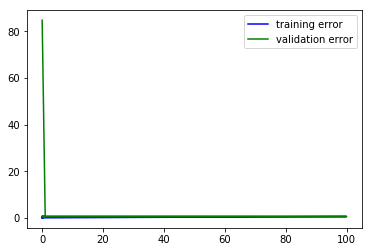

In [80]:
plt.plot(predictions_train_dic.keys(), predictions_train_dic.values(), color = "b", label = "training error")
plt.plot(predictions_valid_dic.keys(), predictions_valid_dic.values(), color = "g", label = "validation error")
plt.legend()

In [81]:
predictions_train_dic

{0: 0.056659468774325143,
 1e-08: 0.00075519559174910854,
 1e-07: 0.0009937474687785621,
 1e-06: 0.0067733386626180675,
 1e-05: 0.044143697383411944,
 0.0001: 0.31197841957888073,
 0.01: 0.60336365417370175,
 0.1: 0.60336365417370175,
 1: 0.60336365417370175,
 100: 0.60336365417370175}

In [82]:
predictions_valid_dic

{0: 84.761352083084887,
 1e-08: 0.67934911532128039,
 1e-07: 0.66185357959643032,
 1e-06: 0.67640445799141491,
 1e-05: 0.62748768384159548,
 0.0001: 0.59008933109015393,
 0.01: 0.59895196244260707,
 0.1: 0.59895196244260707,
 1: 0.59895196244260707,
 100: 0.59895196244260707}

In [13]:
model = graphlab.recommender.factorization_recommender.create(sf_train, user_id='new_user_id', item_id='new_course_id',target='rating',solver='als',side_data_factorization=False, num_factors = 10, regularization=0.1)

Recsys training: model = factorization_recommender

Preparing data set.

Data has 24756 observations with 12294 users and 894 items.

Data prepared in: 0.045248s

Training factorization_recommender for recommendations.

+------------------------------+--------------------------------------------------+----------+

| Parameter                    | Description                                      | Value    |

+------------------------------+--------------------------------------------------+----------+

| num_factors                  | Factor Dimension                                 | 10       |

| regularization               | L2 Regularization on Factors                     | 0.1      |

| max_iterations               | Maximum Number of Iterations                     | 50       |

| solver                       | Solver used for training                         | als      |

+------------------------------+--------------------------------------------------+----------+

+---------+--------------+------------------------+

| Iter.   | Elapsed time | RMSE                   |

+---------+--------------+------------------------+

| Initial | 70us         | NA                     |

+---------+--------------+------------------------+

| 0       | 57.124ms     | 0.598309               |

| 1       | 122.906ms    | 0.598309               |

| 2       | 167.154ms    | 0.598309               |

| 3       | 238.72ms     | 0.598309               |

| 4       | 289.017ms    | 0.598309               |

| 5       | 324.687ms    | 0.598309               |

| 6       | 375.432ms    | 0.598309               |

| 7       | 421.288ms    | 0.598309               |

| 8       | 476.348ms    | 0.598309               |

| 9       | 509.572ms    | 0.598309               |

| 10      | 570.323ms    | 0.598309               |

| 11      | 605.62ms     | 0.598309               |

| 12      | 651.646ms    | 0.598309               |

| 13      | 693.009ms    | 0.598309               |

| 14      | 730.015ms    | 0.598309               |

| 15      | 773.758ms    | 0.598309               |

| 16      | 816.784ms    | 0.598309               |

| 17      | 867.848ms    | 0.598309               |

| 18      | 908.464ms    | 0.598309               |

| 19      | 946.539ms    | 0.598309               |

| 20      | 987.416ms    | 0.598309               |

| 21      | 1.02s        | 0.598309               |

| 22      | 1.08s        | 0.598309               |

| 23      | 1.13s        | 0.598309               |

| 24      | 1.18s        | 0.598309               |

| 25      | 1.23s        | 0.598309               |

| 26      | 1.26s        | 0.598309               |

| 27      | 1.31s        | 0.598309               |

| 28      | 1.36s        | 0.598309               |

| 29      | 1.40s        | 0.598309               |

| 30      | 1.44s        | 0.598309               |

| 31      | 1.48s        | 0.598309               |

| 32      | 1.53s        | 0.598309               |

| 33      | 1.59s        | 0.598309               |

| 34      | 1.63s        | 0.598309               |

| 35      | 1.67s        | 0.598309               |

| 36      | 1.71s        | 0.598309               |

| 37      | 1.75s        | 0.598309               |

| 38      | 1.79s        | 0.598309               |

| 39      | 1.83s        | 0.598309               |

| 40      | 1.87s        | 0.598309               |

| 41      | 1.90s        | 0.598309               |

| 42      | 1.95s        | 0.598309               |

| 43      | 1.99s        | 0.598309               |

| 44      | 2.02s        | 0.598309               |

| 45      | 2.06s        | 0.598309               |

| 46      | 2.10s        | 0.598309               |

| 47      | 2.14s        | 0.598309               |

| 48      | 2.19s        | 0.598309               |

| 49      | 2.23s        | 0.598309               |

| FINAL   | 2.23s        | 0.598309               |

+---------+--------------+------------------------+

Optimization Complete: Iteration limit reached.

In [85]:
predictions_test = model.predict(sf_test)
rmse = np.sqrt(mean_squared_error(sf_test['rating'], predictions_test))

In [14]:
model.recommend()

recommendations finished on 1000/12294 queries. users per second: 5311.21

recommendations finished on 2000/12294 queries. users per second: 10352.2

recommendations finished on 3000/12294 queries. users per second: 15132.9

recommendations finished on 4000/12294 queries. users per second: 19799.3

recommendations finished on 5000/12294 queries. users per second: 24327.9

recommendations finished on 6000/12294 queries. users per second: 28636.5

recommendations finished on 7000/12294 queries. users per second: 32827.2

recommendations finished on 8000/12294 queries. users per second: 36843.1

recommendations finished on 9000/12294 queries. users per second: 40783.8

recommendations finished on 10000/12294 queries. users per second: 44582.9

recommendations finished on 11000/12294 queries. users per second: 48136.3

recommendations finished on 12000/12294 queries. users per second: 50451.8

new_user_id,new_course_id,score,rank
90879,495,4.77225723057,1
90879,555,4.77225723057,2
90879,594,4.77225723057,3
90879,342,4.77225723057,4
90879,803,4.77225723057,5
90879,614,4.77225723057,6
90879,418,4.77225723057,7
90879,644,4.77225723057,8
90879,266,4.77225723057,9
90879,365,4.77225723057,10


In [86]:
print "test set rmse: ", rmse

test set rmse:  0.610682911218


In [13]:
train_df.shape

(24756, 37)

In [53]:
train_df = train_df[train_df["published_title"].notnull()]

In [54]:
train_df.shape

(24756, 37)

In [8]:
#def is_ascii(s):
    #return all(ord(c) < 128 for c in s)

In [9]:
#train_df["valid_char"] = train_df["content"].apply(is_ascii)

In [28]:
#train_df = train_df[train_df["valid_char"] == True]

In [33]:
stop = set(stopwords.words('english'))
stop.add("learn")
stop.add("course")
stop.add("complete")
stop.add("understand")
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()

In [34]:
def clean(doc):
    doc = doc.lower().split("-")
    doc = [i for i in doc if i.isalpha()]
    doc = [i for i in doc if i not in stop]
    doc = [ch for ch in doc if ch not in exclude]
    doc = [lemma.lemmatize(word) for word in doc]
    return doc

In [69]:
reg["title_clean"] = reg["published_title"].apply(clean)

/home/anusha/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [70]:
title = reg.title_clean.tolist()

In [71]:
dictionary = corpora.Dictionary(title)

In [72]:
doc_term_matrix = [dictionary.doc2bow(doc) for doc in title]

In [73]:
Lda = gensim.models.ldamodel.LdaModel

In [74]:
ldamodel = Lda(doc_term_matrix, num_topics=16, id2word = dictionary, passes=30)

In [75]:
ldamodel.print_topics()

[(0,
  u'0.104*"linux" + 0.058*"fundamental" + 0.057*"ccna" + 0.044*"day" + 0.044*"administration" + 0.042*"r" + 0.039*"mysql" + 0.034*"angularjs" + 0.033*"analytics" + 0.029*"command"'),
 (1,
  u'0.235*"beginner" + 0.152*"tutorial" + 0.137*"security" + 0.058*"react" + 0.053*"internet" + 0.050*"privacy" + 0.050*"volume" + 0.033*"redux" + 0.018*"spring" + 0.017*"aspnet"'),
 (2,
  u'0.169*"programming" + 0.098*"mastery" + 0.075*"facebook" + 0.066*"swift" + 0.063*"best" + 0.060*"io" + 0.054*"c" + 0.046*"ad" + 0.041*"production" + 0.038*"page"'),
 (3,
  u'0.222*"business" + 0.103*"home" + 0.083*"php" + 0.066*"wordpress" + 0.058*"work" + 0.033*"money" + 0.033*"unitycourse" + 0.030*"devslopes" + 0.019*"successful" + 0.017*"copywriter"'),
 (4,
  u'0.108*"javascript" + 0.056*"basic" + 0.035*"reading" + 0.033*"memory" + 0.031*"speed" + 0.028*"dowsing" + 0.028*"accelerated" + 0.027*"wireshark" + 0.027*"linuxforbeginners" + 0.026*"easy"'),
 (5,
  u'0.108*"life" + 0.088*"training" + 0.057*"coach" 

In [76]:
title_category = {}
for i, t in enumerate(title):
    topic = max(ldamodel.get_document_topics(dictionary.doc2bow(t)), key = lambda j: j[1])
    title_category[i] = topic[0]  
        

In [77]:
len(title_category)

47583

In [78]:
title_category[0]

0

In [80]:
reg["topic"] = title_category.values()

/home/anusha/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [81]:
reg.to_csv("reg_lda")